in this notebook we would try to answer some of the business questions from a given set of sales data that we have on .csv files for each month of year 2019
we will showcase the chanllenges faced and how we will overcome those challenges.

Here are the questions:
- Q1. what was the best month for sales ? and how much was earned in that month ?
- Q2. which city made the most sales
- Q3. what time we must advertise to maximize our sales?
- Q4. which pair of products are most sold togather?
- Q5. which product is sold the most?

### 1. Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

### 2. Data Preperation

In [ ]:
# try to read a random sales file 
df = pd.read_csv('./SalesAnalysis/Sales_Data/Sales_April_2019.csv')
df.head(3) # we can read file so we are in correct location

#### now to aprroach further 1st step would be to have a common file / dataframe which would contain data across all the months

In [3]:
files = [file for file in os.listdir('./SalesAnalysis/Sales_Data')]
files #here we got all the file names in a list

['Sales_April_2019.csv',
 'Sales_August_2019.csv',
 'Sales_December_2019.csv',
 'Sales_February_2019.csv',
 'Sales_January_2019.csv',
 'Sales_July_2019.csv',
 'Sales_June_2019.csv',
 'Sales_March_2019.csv',
 'Sales_May_2019.csv',
 'Sales_November_2019.csv',
 'Sales_October_2019.csv',
 'Sales_September_2019.csv']

In [4]:
yearData = pd.DataFrame() #prepare a blank dataFrame

for i in files:
    df = pd.read_csv("./SalesAnalysis/Sales_Data/"+i)
    yearData = pd.concat([yearData, df]) # concating the files across axis=0
    
yearData.head(3) 

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"


In [7]:
# creating a seperate csv file with all month data

yearData.to_csv('./SalesAnalysis/year2019Sales.csv', index=False)

In [8]:
# now read directly from the CSV
df = pd.read_csv('./SalesAnalysis/year2019Sales.csv')
df.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


### 3. Data Cleaning

In [11]:
df.isna().any() # oh so all columns has NaN values

Order ID            True
Product             True
Quantity Ordered    True
Price Each          True
Order Date          True
Purchase Address    True
Month               True
dtype: bool

In [14]:
df.dropna(how='all', inplace=True) # If all values are NA, drop that row or column

df.isna().any() 
# so no mone nan values

Order ID            False
Product             False
Quantity Ordered    False
Price Each          False
Order Date          False
Purchase Address    False
Month               False
dtype: bool

In [18]:
df[df['Month'] == 'Or']

# so the column head got concatinated as well from different csv s
# lets clean them well there are multiple ways, 
# way1:one is to assign it back in a  dataframe
# way2: another can be fetch indexes and drop them


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
...,...,...,...,...,...,...,...
185164,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
185551,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
186563,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
186632,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or


In [23]:
# way1:one is to assign it back in a  dataframe

df = df[df['Month'] != 'Or']

# simply we got our desired dataframe


In [ ]:
'''
# way2: another can be fetch indexes and drop them
indexDel =  df[df['Month'] == 'Or'].index
indexDel

df.drop(index =indexDel )

# not using this now
'''

In [24]:
# let's check
df[df['Month'] == 'Or'] 

#all removed

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month


In [28]:
# converting columnms to numeric using 2 different approach

df['Quantity Ordered'] = df['Quantity Ordered'].astype('Int32') 
df['Price Each'] = pd.to_numeric(df['Price Each'])

C:\Users\mad\AppData\Local\Temp\ipykernel_1524\3785465406.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Quantity Ordered'] = df['Quantity Ordered'].astype('Int32')
C:\Users\mad\AppData\Local\Temp\ipykernel_1524\3785465406.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Price Each'] = pd.to_numeric(df['Price Each'])


In [29]:
df.info() # changed to int & float respectively

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186849
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          185950 non-null  object 
 1   Product           185950 non-null  object 
 2   Quantity Ordered  185950 non-null  Int32  
 3   Price Each        185950 non-null  float64
 4   Order Date        185950 non-null  object 
 5   Purchase Address  185950 non-null  object 
 6   Month             185950 non-null  int32  
dtypes: Int32(1), float64(1), int32(1), object(4)
memory usage: 10.1+ MB


#  Q1. what was the best month for sales ? and how much was earned in that month ?

~ Approach:
- first we need to seperate out months from Order Date column
- find the sales in USD by multiplying number of orders with price of each object


In [9]:
#attempt 1

df['Month'] = df['Order Date'].str[0:2]
df['Month'] = df['Month'].astype('int32')
df.head(3)

# we can see that we have NaN values, lets clean them up in

ValueError: cannot convert float NaN to integer

In [15]:
#attempt 2


df['Month'] = df['Order Date'].str[0:2]
df['Month'] = df['Month'].astype('int32')
df.head(3)

# we can see there is some values as 'Or', lets look them up

ValueError: invalid literal for int() with base 10: 'Or'

In [25]:
#attempt 3 - good

df['Month'] = df['Order Date'].str[0:2]
df['Month'] = df['Month'].astype('int32')
df.head(3)

# all good, we have some warning

C:\Users\mad\AppData\Local\Temp\ipykernel_1524\2230699484.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Month'] = df['Order Date'].str[0:2]
C:\Users\mad\AppData\Local\Temp\ipykernel_1524\2230699484.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Month'] = df['Month'].astype('int32')


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4


#### we got month sorted, we need to find out the total sales 

In [27]:
#attempt 4

df['Sales'] = df['Quantity Ordered'] * df['Price Each']
df.head(4)    # this means our data is in string

TypeError: can't multiply sequence by non-int of type 'str'

In [30]:
#attempt 4 - good

df['Sales'] = df['Quantity Ordered'] * df['Price Each']
df.head(4)    # this means our data is in string

C:\Users\mad\AppData\Local\Temp\ipykernel_1524\1910782673.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sales'] = df['Quantity Ordered'] * df['Price Each']


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.9
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.0
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99


###  Q1. what was the best month for sales ? and how much was earned in that month ?

In [32]:
df.groupby('Month').sum(numeric_only = True)

,Quantity Ordered,Price Each,Sales
Month,,,
1,10903,1811768.38,1822256.73
2,13449,2188884.72,2202022.42
3,17005,2791207.83,2807100.38
4,20558,3367671.02,3390670.24
5,18667,3135125.13,3152606.75
6,15253,2562025.61,2577802.26
7,16072,2632539.56,2647775.76
8,13448,2230345.42,2244467.88
9,13109,2084992.09,2097560.13


In [42]:
rep1 = df.groupby('Month').sum(numeric_only = True)
rep1.reset_index(inplace = True)

rep1[rep1['Sales']==df.groupby('Month').sum(numeric_only = True)['Sales'].max() ] 

# we can see month 12 ie december made highest sales

,Month,Quantity Ordered,Price Each,Sales
11,12,28114,4588415.41,4613443.34


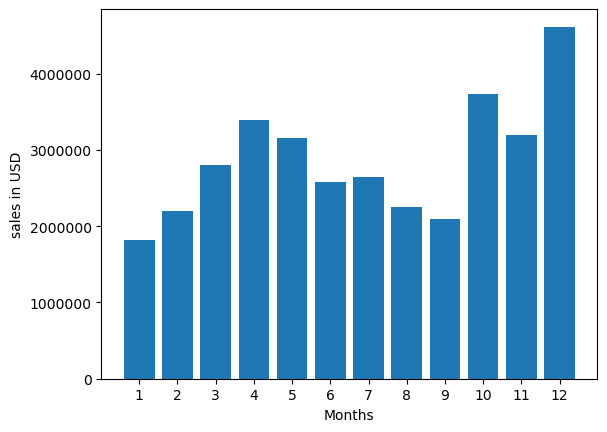

In [45]:
# visualization 1

plt.ticklabel_format(style='plain')

plt.bar(rep1['Month'], rep1['Sales'])
plt.xticks(rep1['Month'])
plt.xlabel('Months')
plt.ylabel('sales in USD')
plt.show()


#  Q2. which city made the most sales

~ Approach:
- seperate out the city from purchase address

--  problem: city name can be common for two different states
- seperate out the state & city from purchase address

In [47]:
df['City'] = df['Purchase Address'].apply(lambda x : x.split(',')[1].strip())
df.head(5)

C:\Users\mad\AppData\Local\Temp\ipykernel_1524\233511507.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['City'] = df['Purchase Address'].apply(lambda x : x.split(',')[1].strip())


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.9,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.0,Los Angeles
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles


In [52]:
df['State'] = df['Purchase Address'].apply(lambda x: x.split(',')[1]+'-'+x.split(',')[-1].strip().split(' ')[0])
df.head(5)

C:\Users\mad\AppData\Local\Temp\ipykernel_1524\1390167298.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['State'] = df['Purchase Address'].apply(lambda x: x.split(',')[1]+'-'+x.split(',')[-1].strip().split(' ')[0])


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,State
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.9,Dallas,Dallas-TX
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,Boston-MA
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.0,Los Angeles,Los Angeles-CA
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,Los Angeles-CA
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,Los Angeles-CA


In [53]:
rep2 = df.groupby('State').sum(numeric_only = True)
rep2.reset_index(inplace = True)
rep2

,State,Quantity Ordered,Price Each,Month,Sales
0,Atlanta-GA,16602,2779908.20,104794,2795498.58
1,Austin-TX,11153,1809873.61,69829,1819581.75
2,Boston-MA,22528,3637409.77,141112,3661642.01
3,Dallas-TX,16730,2752627.82,104620,2767975.4
4,Los Angeles-CA,33289,5421435.23,208325,5452570.8
5,New York City-NY,27932,4635370.83,175741,4664317.43
6,Portland-ME,2750,447189.25,17144,449758.27
7,Portland-OR,11303,1860558.22,70621,1870732.34
8,San Francisco-CA,50239,8211461.74,315520,8262203.91
9,Seattle-WA,16553,2733296.01,104941,2747755.48


In [58]:
#  Q2. which city made the most sales

rep2[rep2['Sales'] == rep2['Sales'].max()]

,State,Quantity Ordered,Price Each,Month,Sales
8,San Francisco-CA,50239,8211461.74,315520,8262203.91


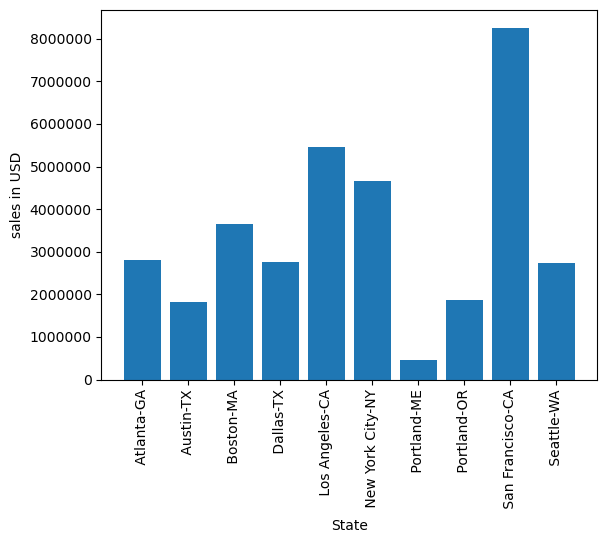

In [59]:
#visualization 2

plt.ticklabel_format(style='plain')

plt.bar(rep2['State'].unique(), rep2['Sales'])
plt.xticks(rep2['State'], rotation = 90)
plt.xlabel('State')
plt.ylabel('sales in USD')
plt.show()

# Q3. what time we must advertise to maximize our sales?

approach :
- need to extract datetime information

In [61]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Hour'] = df['Order Date'].dt.hour
df['Minute'] = df['Order Date'].dt.minute
df.head()

C:\Users\mad\AppData\Local\Temp\ipykernel_1524\333102566.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Order Date'] = pd.to_datetime(df['Order Date'])
C:\Users\mad\AppData\Local\Temp\ipykernel_1524\333102566.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Hour'] = df['Order Date'].dt.hour
C:\Users\mad\AppData\Local\Temp\ipykernel_1524\333102566.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value i

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,State,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.9,Dallas,Dallas-TX,8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,Boston-MA,22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.0,Los Angeles,Los Angeles-CA,14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,Los Angeles-CA,14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,Los Angeles-CA,9,27


In [65]:
rep3 = df.groupby('Hour').count()
rep3.reset_index(inplace = True)
rep3

,Hour,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,State,Minute
0,0,3910,3910,3910,3910,3910,3910,3910,3910,3910,3910,3910
1,1,2350,2350,2350,2350,2350,2350,2350,2350,2350,2350,2350
2,2,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243
3,3,831,831,831,831,831,831,831,831,831,831,831
4,4,854,854,854,854,854,854,854,854,854,854,854
5,5,1321,1321,1321,1321,1321,1321,1321,1321,1321,1321,1321
6,6,2482,2482,2482,2482,2482,2482,2482,2482,2482,2482,2482
7,7,4011,4011,4011,4011,4011,4011,4011,4011,4011,4011,4011
8,8,6256,6256,6256,6256,6256,6256,6256,6256,6256,6256,6256
9,9,8748,8748,8748,8748,8748,8748,8748,8748,8748,8748,8748


Text(0, 0.5, 'Number of Orders')

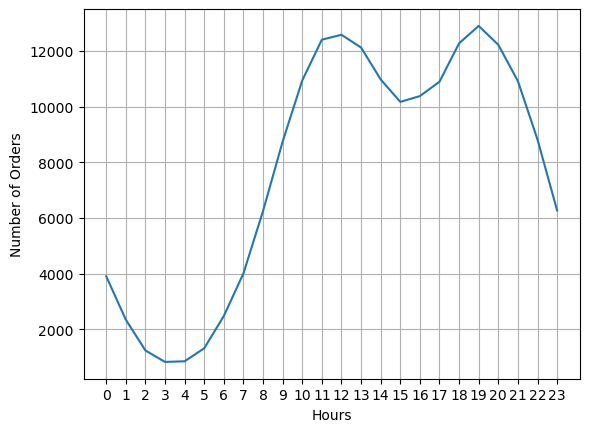

In [64]:
# Vizualization 3

plt.plot(rep3['Hour'], rep3['Sales'])
plt.xticks(rep3['Hour'])
plt.grid()
plt.xlabel('Hours')
plt.ylabel('Number of Orders')

we can see at 19hrs sp at 7:pm most of the orders (12905) were placed

# Q4. which pair of products are most sold togather?
approach:
- find the orders with similar order ID 

In [67]:
df.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,State,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.9,Dallas,Dallas-TX,8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,Boston-MA,22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.0,Los Angeles,Los Angeles-CA,14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,Los Angeles-CA,14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,Los Angeles-CA,9,27


In [68]:
df1 =df[df['Order ID'].duplicated(keep = False)]
df1    

# removing all the unique order ids so we can have all the rows with similar order ids

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,State,Hour,Minute
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.0,Los Angeles,Los Angeles-CA,14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,Los Angeles-CA,14,38
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,600.0,Los Angeles,Los Angeles-CA,19,42
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles,Los Angeles-CA,19,42
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,Boston,Boston-MA,11,31
...,...,...,...,...,...,...,...,...,...,...,...,...
186792,259303,AA Batteries (4-pack),1,3.84,2019-09-20 20:18:00,"106 7th St, Atlanta, GA 30301",9,3.84,Atlanta,Atlanta-GA,20,18
186803,259314,Wired Headphones,1,11.99,2019-09-16 00:25:00,"241 Highland St, Atlanta, GA 30301",9,11.99,Atlanta,Atlanta-GA,0,25
186804,259314,AAA Batteries (4-pack),2,2.99,2019-09-16 00:25:00,"241 Highland St, Atlanta, GA 30301",9,5.98,Atlanta,Atlanta-GA,0,25
186841,259350,Google Phone,1,600.00,2019-09-30 13:49:00,"519 Maple St, San Francisco, CA 94016",9,600.0,San Francisco,San Francisco-CA,13,49


In [69]:
df1['Grouped'] = df1.groupby('Order ID')['Product'].transform(lambda x : ','.join(x) )
df1

C:\Users\mad\AppData\Local\Temp\ipykernel_1524\3553639292.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Grouped'] = df1.groupby('Order ID')['Product'].transform(lambda x : ','.join(x) )


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,State,Hour,Minute,Grouped
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.0,Los Angeles,Los Angeles-CA,14,38,"Google Phone,Wired Headphones"
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,Los Angeles-CA,14,38,"Google Phone,Wired Headphones"
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,600.0,Los Angeles,Los Angeles-CA,19,42,"Google Phone,USB-C Charging Cable"
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles,Los Angeles-CA,19,42,"Google Phone,USB-C Charging Cable"
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,Boston,Boston-MA,11,31,"Bose SoundSport Headphones,Bose SoundSport Hea..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
186792,259303,AA Batteries (4-pack),1,3.84,2019-09-20 20:18:00,"106 7th St, Atlanta, GA 30301",9,3.84,Atlanta,Atlanta-GA,20,18,"34in Ultrawide Monitor,AA Batteries (4-pack)"
186803,259314,Wired Headphones,1,11.99,2019-09-16 00:25:00,"241 Highland St, Atlanta, GA 30301",9,11.99,Atlanta,Atlanta-GA,0,25,"Wired Headphones,AAA Batteries (4-pack)"
186804,259314,AAA Batteries (4-pack),2,2.99,2019-09-16 00:25:00,"241 Highland St, Atlanta, GA 30301",9,5.98,Atlanta,Atlanta-GA,0,25,"Wired Headphones,AAA Batteries (4-pack)"
186841,259350,Google Phone,1,600.00,2019-09-30 13:49:00,"519 Maple St, San Francisco, CA 94016",9,600.0,San Francisco,San Francisco-CA,13,49,"Google Phone,USB-C Charging Cable"


In [72]:
df1[['Order ID', 'Grouped']]

,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
4,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
19,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
...,...,...
186792,259303,"34in Ultrawide Monitor,AA Batteries (4-pack)"
186803,259314,"Wired Headphones,AAA Batteries (4-pack)"
186804,259314,"Wired Headphones,AAA Batteries (4-pack)"
186841,259350,"Google Phone,USB-C Charging Cable"


In [73]:
# now we have all the items under grouped column but think there would be other rows with same order id with same items
# need to remove duplicates

df1 = df1[['Order ID', 'Grouped']].drop_duplicates()
df1

,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"
...,...,...
186781,259296,"Apple Airpods Headphones,Apple Airpods Headphones"
186783,259297,"iPhone,Lightning Charging Cable,Lightning Char..."
186791,259303,"34in Ultrawide Monitor,AA Batteries (4-pack)"
186803,259314,"Wired Headphones,AAA Batteries (4-pack)"


In [74]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df1['Grouped']:
    row_list =row.split(',')
    count.update(Counter(combinations(row_list, 2))) # as we are only searching pair of products
    
for key, value in count.most_common(10):
    print(key,value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


In [75]:
# ('iPhone', 'Lightning Charging Cable') bundle were sold 1005 times

# Q5. which product is sold the most?

In [77]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,State,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.9,Dallas,Dallas-TX,8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,Boston-MA,22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.0,Los Angeles,Los Angeles-CA,14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,Los Angeles-CA,14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,Los Angeles-CA,9,27


In [78]:
rep5 = df.groupby('Product').sum()
rep5.reset_index(inplace=True)
rep5

C:\Users\mad\AppData\Local\Temp\ipykernel_1524\2817117449.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  rep5 = df.groupby('Product').sum()


,Product,Quantity Ordered,Price Each,Month,Sales,Hour,Minute
0,20in Monitor,4129,451068.99,29336,454148.71,58764,122252
1,27in 4K Gaming Monitor,6244,2429637.70,44440,2435097.56,90916,184331
2,27in FHD Monitor,7550,1125974.93,52558,1132424.5,107540,219948
3,34in Ultrawide Monitor,6199,2348718.19,43304,2355558.01,89076,183480
4,AA Batteries (4-pack),27635,79015.68,145558,106118.4,298342,609039
5,AAA Batteries (4-pack),31017,61716.59,146370,92740.83,297332,612113
6,Apple Airpods Headphones,15661,2332350.00,109477,2349150.0,223304,455570
7,Bose SoundSport Headphones,13457,1332366.75,94113,1345565.43,192445,392603
8,Flatscreen TV,4819,1440000.00,34224,1445700.0,68815,142789
9,Google Phone,5532,3315000.00,38305,3319200.0,79479,162773


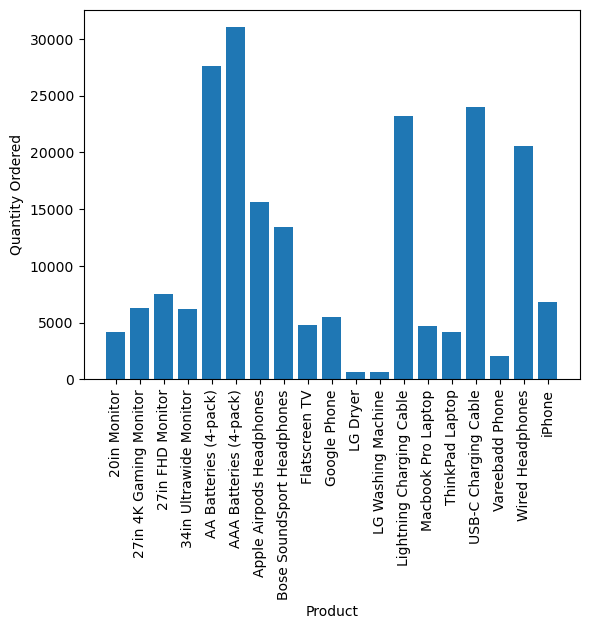

In [80]:
# Vizualization-5

plt.ticklabel_format(style='plain')

plt.bar(rep5['Product'], rep5['Quantity Ordered'])
plt.xticks(rep5['Product'], rotation = 90)
plt.xlabel('Product')
plt.ylabel('Quantity Ordered')
plt.show()

most sold item is AA Batteries (4-pack)

In [81]:
prices = df.groupby('Product').mean()['Price Each']
prices

C:\Users\mad\AppData\Local\Temp\ipykernel_1524\1126149316.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  prices = df.groupby('Product').mean()['Price Each']


Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64

C:\Users\mad\AppData\Local\Temp\ipykernel_1524\964808338.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(rep5['Product'], rotation = 90)


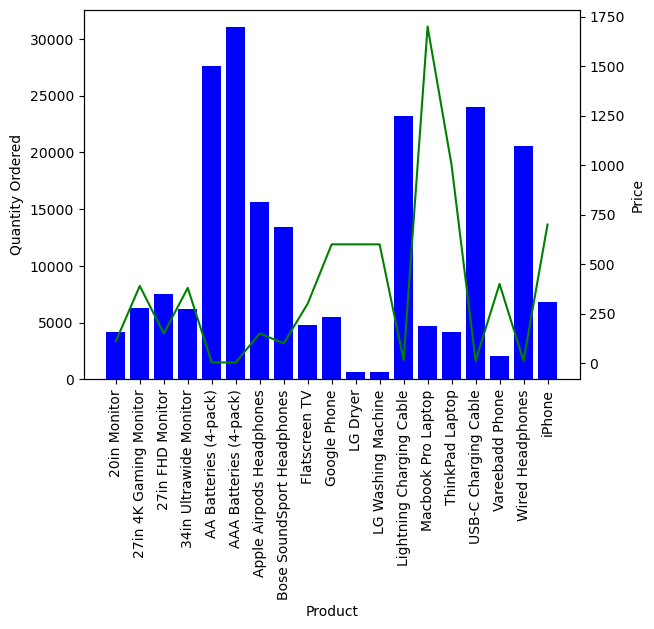

In [84]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.bar(rep5['Product'], rep5['Quantity Ordered'], color='blue')
ax2.plot(rep5['Product'], prices ,color='green')

ax1.set_xlabel('Product')
ax1.set_ylabel('Quantity Ordered')
ax2.set_ylabel('Price')
ax1.set_xticklabels(rep5['Product'], rotation = 90)

plt.show()

In [87]:
# we tried to figure out price of each item and freq of purchase of these items